# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython/book
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/2/7

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [1]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정 (utils, figures 등)
UTILS = f"{BASE}/utils"
FIGS  = f"{BASE}/figures"

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [2]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.0/186.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.3 which is incompatible.
google-adk 1.23.0 requires requests<3.0.0,>=2.32.4, but you have requests 2.32.3 which is incompatible.
Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_Fin

## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


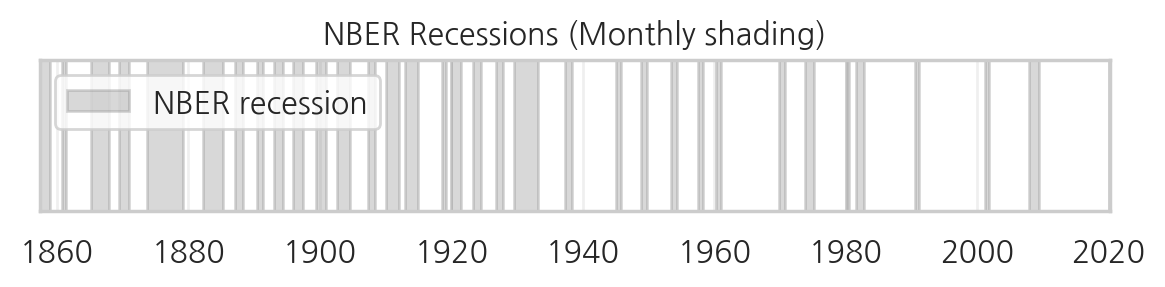

In [3]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# END OF PREAMBLE

# Main

In [4]:
def cumret(df, NetReturn=True, InPercentage=True):
    '''
    function for converting return to cumulative one
    df: net return data (not gross return)
    InPercentage=True: denoted as 3.14%, not 0.0314
    '''
    if InPercentage==True:
        if NetReturn==True:
            lnret = np.log(1+df/100)
        else:
            lnret = np.log(df/100)
    else:
        if NetReturn==True:
            lnret = np.log(1+df)
        else:
            lnret = np.log(df)

    cum_ret = np.exp(lnret.cumsum())-1

    return cum_ret

In [5]:
def plot_ret(df, title, InPercentage=True):
    '''
    function for plotting the time series of returns
    df: dataframe of the returns
    title: figure title
    InPercentage=True: denoted as 3.14%, not 0.0314
    '''
    fig, ax = plt.subplots(1,1,figsize=(9,6))

    if InPercentage==True:
        df = df*100
        ax.set_ylabel('(%)')

    ax.plot(df)
    ax.set_title(title)
    ax.grid()
    ax.legend(df.columns)

    save_fig(title)

## Importing data from Fama-French website

In [7]:
import os
import pandas_datareader as pdr
from datetime import date
import pandas_datareader.data as web  # module for reading datasets directly from the web
from pandas_datareader.famafrench import get_available_datasets

In [8]:
start_date = '1926-07-01'
end_date = '2023-12-31'

FF3 = web.DataReader('F-F_Research_Data_Factors', 'famafrench',start=start_date,end=end_date)[0]
FF3.index.names=['mdate']
FF3['Mkt'] = FF3['Mkt-RF'] + FF3['RF']
FF3.head(2)

,Mkt-RF,SMB,HML,RF,Mkt
mdate,,,,,
1926-07,2.890,-2.550,-2.390,0.220,3.110
1926-08,2.640,-1.140,3.810,0.250,2.890


In [9]:
def generate_EP_statistics(df, start, end):
  '''
  calcaulate the average of market portfolio, riskfree rate, and equity premium + Sharpe ratio

  input:
    df: return data
    start: starting date
    end: ending date
  '''
  avg_rm = FF3.loc[start:end,'Mkt'].mean()*12
  avg_rf = FF3.loc[start:end,'RF'].mean()*12
  AnnualRe = FF3.loc[start:end,'Mkt-RF'].mean()*12
  SigmaRe = FF3.loc[start:end,'Mkt-RF'].std()*np.sqrt(12)
  SR = AnnualRe/SigmaRe

  var_name = start+':'+end
  index = ['avg. market return','avg. riskfree rate','avg. equity premium','std','Sharpe ratio']
  df_table = pd.DataFrame({var_name:[avg_rm,avg_rf,AnnualRe,SigmaRe,SR]},index=index)
  return df_table

In [10]:
df1 = generate_EP_statistics(FF3,'1926','2023')
print(df1)
df2 = generate_EP_statistics(FF3,'1946','2023')
print(df2)
df3 = generate_EP_statistics(FF3,'2000','2023')
print(df3)
df4 = generate_EP_statistics(FF3,'2008','2023')
print(df4)

                     1926:2023
avg. market return      11.365
avg. riskfree rate       3.211
avg. equity premium      8.153
std                     18.504
Sharpe ratio             0.441
                     1946:2023
avg. market return      11.597
avg. riskfree rate       3.763
avg. equity premium      7.834
std                     15.020
Sharpe ratio             0.522
                     2000:2023
avg. market return       8.307
avg. riskfree rate       1.625
avg. equity premium      6.682
std                     16.025
Sharpe ratio             0.417
                     2008:2023
avg. market return      10.902
avg. riskfree rate       0.843
avg. equity premium     10.060
std                     16.729
Sharpe ratio             0.601


In [11]:
print(generate_EP_statistics(FF3,'1946','2005'))

                     1946:2005
avg. market return      11.825
avg. riskfree rate       4.513
avg. equity premium      7.312
std                     14.724
Sharpe ratio             0.497


In [12]:
print(generate_EP_statistics(FF3,'1946','2023'))

                     1946:2023
avg. market return      11.597
avg. riskfree rate       3.763
avg. equity premium      7.834
std                     15.020
Sharpe ratio             0.522


In [13]:
print(generate_EP_statistics(FF3,'2008','2023'))

                     2008:2023
avg. market return      10.902
avg. riskfree rate       0.843
avg. equity premium     10.060
std                     16.729
Sharpe ratio             0.601


## Mehra and Prescott (1985)

In [14]:
# 모수 값
u = 1.06    # 호황
d = 0.98    # 불황
beta = 0.99 # 주관적 시선호율

gamma = 10  # 상대적 위험기피계수
x = -0.3    # 지속성(persistence) 모수

puu = (1 + x) / 2
pud = (1 - x) / 2
pdu = (1 - x) / 2
pdd = (1 + x) / 2

buu = beta * puu * u ** (-gamma)
bud = beta * pud * d ** (-gamma)
bdu = beta * pdu * u ** (-gamma)
bdd = beta * pdd * d ** (-gamma)

In [15]:
# perpetuity
A = np.array([[1 - buu, -bud],
              [-bdu, 1 - bdd]])

pp = np.linalg.inv(A).dot(np.array([buu + bud,
                                     bdu + bdd]))

# 1-기간 무위험 이자율
Rf = 1 / np.array([buu + bud, bdu + bdd])

# p/d or p/c 비율
cuu = beta * puu * u ** (1 - gamma)
cud = beta * pud * d ** (1 - gamma)
cdu = beta * pdu * u ** (1 - gamma)
cdd = beta * pdd * d ** (1 - gamma)

A = np.array([[1 - cuu, -cud],
              [-cdu, 1 - cdd]])
pc = np.linalg.inv(A).dot(np.array([cuu + cud,
                                     cdu + cdd]))

# expected return
ER = np.array([puu * (pc[0] + 1) * u / pc[0] + pud * (pc[1] + 1) * d / pc[0],
               pdu * (pc[0] + 1) * u / pc[1] + pdd * (pc[1] + 1) * d / pc[1]])
ERp = np.array([puu * (pp[0] + 1) / pp[0] + pud * (pp[1] + 1) / pp[0],
                pdu * (pp[0] + 1) / pp[1] + pdd * (pp[1] + 1) / pp[1]])

Edc = np.array([puu * u + pud * d,
                pdu * u + pdd * d])
phi = (Edc[1] - Edc[0]) / (d - u)

# actual returns
pc1 = np.array([1, 1])[:, np.newaxis] * pc
dc1 = np.array([u, d])[:, np.newaxis]
pc0 = pc[:, np.newaxis] * np.array([1, 1])
Rs = ((pc1 + 1) * dc1) / pc0
Rs = (Rs - 1) * 100

pp1 = np.array([1, 1])[:, np.newaxis] * pp
pp0 = pp[:, np.newaxis] * np.array([1, 1])
Rp = (pp1 + 1) / pp0
Rp = (Rp - 1) * 100

In [16]:
shortoutput = True

if shortoutput:
    print('gamma | x')
    print([gamma, x])
    print('bond price  |  p/c  |  Rf  |  ER-Rf  |  ERp-Rf')
    print('first line = good state, second line = bad state')
    print([pp[0], pc[0], 100 * (Rf[0] - 1), 100 * (ER[0] - Rf[0]), 100 * (ERp[0] - Rf[0])])
    print([pp[1], pc[1], 100 * (Rf[1] - 1), 100 * (ER[1] - Rf[1]), 100 * (ERp[1] - Rf[1])])
    print('stock excess return (2x2) | bond excess return (2x2)')
    print('[ u -> u   u -> d]')
    print('[ d -> u   d -> d]')
    print(np.hstack([(Rs[0] - 100 * (Rf[0] - 1)), (Rp[0] - 100 * (Rf[0] - 1))]))
    print(np.hstack([(Rs[1] - 100 * (Rf[1] - 1)), (Rp[1] - 100 * (Rf[1] - 1))]))
else:
    print([u, d, beta, gamma, x, phi])
    print([(u - 1) * 100, (Edc[0] - 1) * 100, pp[0], pc[0], 100 * (Rf[0] - 1), 100 * (ER[0] - 1),
           100 * (ERp[0] - 1), 100 * (ER[0] - Rf[0]), 100 * (ERp[0] - Rf[0])])
    print([(d - 1) * 100, (Edc[1] - 1) * 100, pp[1], pc[1], 100 * (Rf[1] - 1), 100 * (ER[1] - 1),
           100 * (ERp[1] - 1), 100 * (ER[1] - Rf[1]), 100 * (ERp[1] - Rf[1])])
    print(np.hstack([Rs[0], (Rs[0] - 100 * (Rf[0] - 1)), Rp[0], (Rp[0] - 100 * (Rf[0] - 1))]))
    print(np.hstack([Rs[1], (Rs[1] - 100 * (Rf[1] - 1)), Rp[1], (Rp[1] - 100 * (Rf[1] - 1))]))


gamma | x
[10, -0.3]
bond price  |  p/c  |  Rf  |  ER-Rf  |  ERp-Rf
first line = good state, second line = bad state
[np.float64(6.512410539149508), np.float64(6.950908037427611), np.float64(1.9314682949143513), np.float64(3.676526661416646), np.float64(2.554726274799357)]
[np.float64(5.423425012941491), np.float64(5.893136150235657), np.float64(27.648408548181248), np.float64(5.430501176394609), np.float64(3.8416662285498004)]
stock excess return (2x2) | bond excess return (2x2)
[ u -> u   u -> d]
[ d -> u   d -> d]
[19.318  3.188 13.424 -3.298]
[  4.571 -13.019  10.869  -9.21 ]


In [17]:
shortoutput = True

if shortoutput:
    print(f'상대적 위험기피 계수(gamma): {gamma:.2g}')
    print(f'persistence(x): {x:.2g}')
    print('\n')


    print('bond price  |  p/c  |  Rf  |  ER-Rf  |  ERp-Rf')
    print('first line = good state, second line = bad state')
    print([pp[0], pc[0], 100 * (Rf[0] - 1), 100 * (ER[0] - Rf[0]), 100 * (ERp[0] - Rf[0])])
    print([pp[1], pc[1], 100 * (Rf[1] - 1), 100 * (ER[1] - Rf[1]), 100 * (ERp[1] - Rf[1])])
    print('stock excess return (2x2) | bond excess return (2x2)')
    print('[ u -> u   u -> d]')
    print('[ d -> u   d -> d]')
    print(np.hstack([(Rs[0] - 100 * (Rf[0] - 1)), (Rp[0] - 100 * (Rf[0] - 1))]))
    print(np.hstack([(Rs[1] - 100 * (Rf[1] - 1)), (Rp[1] - 100 * (Rf[1] - 1))]))
else:
    print([u, d, beta, gamma, x, phi])
    print([(u - 1) * 100, (Edc[0] - 1) * 100, pp[0], pc[0], 100 * (Rf[0] - 1), 100 * (ER[0] - 1),
           100 * (ERp[0] - 1), 100 * (ER[0] - Rf[0]), 100 * (ERp[0] - Rf[0])])
    print([(d - 1) * 100, (Edc[1] - 1) * 100, pp[1], pc[1], 100 * (Rf[1] - 1), 100 * (ER[1] - 1),
           100 * (ERp[1] - 1), 100 * (ER[1] - Rf[1]), 100 * (ERp[1] - Rf[1])])
    print(np.hstack([Rs[0], (Rs[0] - 100 * (Rf[0] - 1)), Rp[0], (Rp[0] - 100 * (Rf[0] - 1))]))
    print(np.hstack([Rs[1], (Rs[1] - 100 * (Rf[1] - 1)), Rp[1], (Rp[1] - 100 * (Rf[1] - 1))]))


상대적 위험기피 계수(gamma): 10
persistence(x): -0.3


bond price  |  p/c  |  Rf  |  ER-Rf  |  ERp-Rf
first line = good state, second line = bad state
[np.float64(6.512410539149508), np.float64(6.950908037427611), np.float64(1.9314682949143513), np.float64(3.676526661416646), np.float64(2.554726274799357)]
[np.float64(5.423425012941491), np.float64(5.893136150235657), np.float64(27.648408548181248), np.float64(5.430501176394609), np.float64(3.8416662285498004)]
stock excess return (2x2) | bond excess return (2x2)
[ u -> u   u -> d]
[ d -> u   d -> d]
[19.318  3.188 13.424 -3.298]
[  4.571 -13.019  10.869  -9.21 ]
